In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/sample_submission.csv


# Bag Of Words [NLP METHOD]

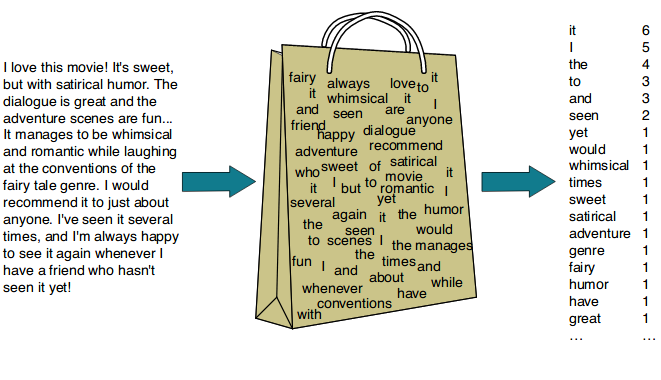

I feel this is the simplest method in NLP. It includes a basic concept that is creating the text into a vector form which includes the frequency of each word in the sentence - hence creating a vector which will be an independent feature for our model and the classification of text(1 or 0 as in this dataset) will be the dependent feature. Model can be trained using any algorithm (Decision Tree Classifier, Naive Bais). However this method is less efficient as it ignores the semantic part of the text. 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../input/nlp-getting-started/train.csv')

In [5]:
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


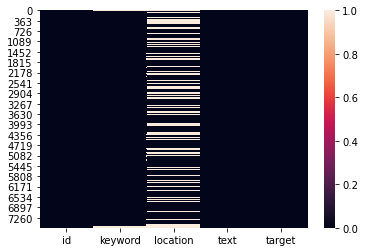

In [7]:
sns.heatmap(df.isnull())

The columns - keyword and location will be dropped as they are of no use to us.

In [8]:
df.drop(['location','keyword'],axis=1,inplace=True)

In [9]:
df

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


In [10]:
real = df[df['target']==1]

In [11]:
real

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


In [12]:
unreal = df[df['target']==0]

In [13]:
unreal

,id,text,target
15,23,What's up man?,0
16,24,I love fruits,0
17,25,Summer is lovely,0
18,26,My car is so fast,0
19,28,What a goooooooaaaaaal!!!!!!,0
...,...,...,...
7581,10833,@engineshed Great atmosphere at the British Li...,0
7582,10834,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,These boxes are ready to explode! Exploding Ki...,0
7587,10841,Sirens everywhere!,0


In [14]:
print('real disaster message percentage:',(len(real)/len(df))*100)

real disaster message percentage: 42.96597924602653


In [15]:
print('fake disaster message percentage:',(len(unreal)/len(df))*100)

fake disaster message percentage: 57.03402075397347


Data Visualisation

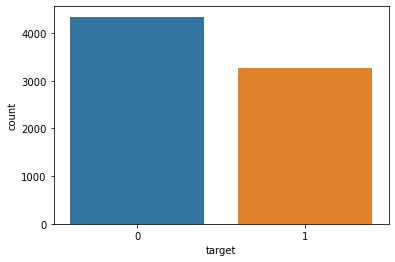

In [16]:
sns.countplot(df['target'])

We have quite balanced data!

In [17]:
import string


In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
from nltk.corpus import stopwords

In [20]:
stopwords.words('english');

In [21]:
def message_cleaning(message):
    test_punc_removed = [char   for char in message if char not in string.punctuation]
    test_punc_removed_joined = ''.join(test_punc_removed)
    test_punc_removed_joined_clean = [word   for word in test_punc_removed_joined.split(' ') if word not in stopwords.words('english')]
    return test_punc_removed_joined_clean

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
vectorizer = CountVectorizer(analyzer=message_cleaning)

We are going to vectorize the text along with increasing the readablity of the text by removing the punctuations and countwords!

In [24]:
disaster_tweet_vectorizer = vectorizer.fit_transform(df['text'])

In [25]:
print(vectorizer.get_feature_names());

['', '\n', '\n\n', '\n\n1', '\n\nBurned', '\n\nCalum36Chambers', '\n\nCity', '\n\nD', '\n\nEarly', '\n\nFOLLOW', '\n\nGet', '\n\nGood', '\n\nHow', '\n\nIf', '\n\nIm', '\n\nIn', '\n\nIve', '\n\nJust', '\n\nKowing', '\n\nMP', '\n\nMTVSummerStar', '\n\nMay', '\n\nMost', '\n\nMy', '\n\nN', '\n\nNot', '\n\nNotley', '\n\nOMFG', '\n\nPlane', '\n\nScreams', '\n\nShuffle', '\n\nSuch', '\n\nThe', '\n\nTodd', '\n\nWhat', '\n\nWhile', '\n\nWow', '\n\ndan', '\n\nfucking', '\n\nhttpstco6vyYER6PY0', '\n\nhttpstco7SPyDy1csc', '\n\nhttptcoIPwySnik0G', '\n\nmillions\napunk\nhang', '\n1', '\n8', '\nA', '\nAlso', '\nArmageddon', '\nAs', '\nBodies', '\nCROSED', '\nCheck\nHappy', '\nChelsea', '\nColts', '\nCumtown\nBJNutt\ncumslut2\nGirlsLoveCum', '\nDue', '\nEVERY', '\nFARRAKHAN', '\nFear', '\nFires', '\nForest', '\nGave', '\nGet', '\nGoBlue', '\nHe', '\nHomealone2', '\nI', '\nIn', '\nIssued', '\nIts', '\nJTW', '\nKatherines', '\nMTVHottest', '\nMay', '\nNever', '\nNo', '\nNorge2040', '\nOur', '\nParents',

In [26]:
print(disaster_tweet_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


This matrix shows the count of unique words (as shown in previous cell output) in each sentance.

In [27]:
disaster_tweet_vectorizer.shape

(7613, 26918)

So there are 7613 disaster tweets and 21637 unique words.

In [28]:
label = df['target']

In [29]:
label.shape

(7613,)

**Training the Model**

In [30]:
X = disaster_tweet_vectorizer

In [31]:
X = X.toarray()

In [32]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [33]:
y = label

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [37]:
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
NB = GaussianNB()

In [38]:
RFC.fit(X_train,y_train)
DTC.fit(X_train,y_train)
NB.fit(X_train,y_train)
LR.fit(X_train,y_train)

LogisticRegression()

Making Prediction

In [40]:
predict1 = RFC.predict(X_test)
predict2 = DTC.predict(X_test)
predict3 = NB.predict(X_test)
predict4 = LR.predict(X_test)

**Checking the Performance**

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(y_test,prediction))

In [42]:
print(accuracy_score(y_test,predict1))
print('\n')
print(accuracy_score(y_test,predict2))
print('\n')
print(accuracy_score(y_test,predict3))
print('\n')
print(accuracy_score(y_test,predict4))

0.782399299474606


0.7543782837127846


0.6282837127845884


0.792031523642732


Highest Accuracy Using Logisitic Regression.

The accuracy is quite good!

Lets predict for testing dataset

In [44]:
test_df = pd.read_csv('../input/nlp-getting-started/test.csv')

In [45]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [46]:
test_df.drop(['keyword','location'],axis=1,inplace= True)

In [47]:
test_df.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [48]:
test_vectorizer = vectorizer.transform(test_df['text'])

In [49]:
test_vectorizer.shape

(3263, 26918)

Lets Predict!

In [50]:
final_predictions = LR.predict(test_vectorizer)

In [51]:
final_predictions

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
submission_df = pd.DataFrame()

In [54]:
submission_df['id'] = test_df['id']
submission_df['target'] = final_predictions

In [56]:
submission_df['target'].value_counts()

0    2143
1    1120
Name: target, dtype: int64